Analyzing Periodicity in Six Groundwater Wells in the Santa Ana Subbasin of California- Aaron McGarvey

The following is a time series analysis of daily measurements of Depth-to-Water [ft] in 6 groundwater monitoring wells in the Santa Ana groundwater subbsain of San Bernardino County, California, a critically overdrafted basin according to Bulletin 118 of California's Sustainable Groundwater Management Act. The length of the measurements vary, with the longest dataset going back to 1991 and the shortest starting in 2008, but all are daily measurements. 

Data comes from the USGS website Groudwater Watch, which cronicles daily depth-to-water and water table measurements for aquifers across the USA. 

The purpose and scope of the project is to perform a Time Series analysis using Python techniques learned in class to analyze the periodicity of fluctuating water levels in California's groudnwater aquifers.  Additional practical uses of the data could include resource planning and policy evaluation for extraction of California's groundwater for agricultural, municipal, and domestic use.    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
#reading in the data, 6 separate txt files with numerous columns, parsing dates, and choosing which columns to use
well1 = pd.read_csv('./RawWellDataUSGS.txt',delimiter=r"\s+", usecols= [4,5], parse_dates=True, infer_datetime_format=True, header=None)
well1.columns = ['Date', 'Depth to Water ft']

well2 = pd.read_csv('./RawWellDataUSGS2.txt',delimiter=r"\s+", usecols= [2,3], parse_dates=True, infer_datetime_format=True, header=None)
well2.columns = ['Date', 'Depth to Water ft']

well3 = pd.read_csv('./RawWellDataUSGS3.txt',delimiter=r"\s+", usecols= [2,3], parse_dates=True, infer_datetime_format=True, header=None)
well3.columns = ['Date', 'Depth to Water ft']

well4 = pd.read_csv('./RawWellDataUSGS4.txt',delimiter=r"\s+", usecols= [2,3], parse_dates=True, infer_datetime_format=True, header=None)
well4.columns = ['Date', 'Depth to Water ft']

well5 = pd.read_csv('./RawWellDataUSGS5.txt',delimiter=r"\s+", usecols= [2,3], parse_dates=True, infer_datetime_format=True, header=None)
well5.columns = ['Date', 'Depth to Water ft']

well6 = pd.read_csv('./RawWellDataUSGS6.txt',delimiter=r"\s+", usecols= [2,3], parse_dates=True, infer_datetime_format=True, header=None)
well6.columns = ['Date', 'Depth to Water ft']

In [4]:
well1.dtypes, well2.dtypes, well3.dtypes, well4.dtypes, well5.dtypes, well6.dtypes #looking at the data types, notice 'Date' is an object

(Date                  object
 Depth to Water ft    float64
 dtype: object, Date                  object
 Depth to Water ft    float64
 dtype: object, Date                  object
 Depth to Water ft    float64
 dtype: object, Date                  object
 Depth to Water ft    float64
 dtype: object, Date                  object
 Depth to Water ft    float64
 dtype: object, Date                  object
 Depth to Water ft    float64
 dtype: object)

In [5]:
#converting the dtype of the Date column so Pandas can understand it as a time series
well1['Date'] = pd.to_datetime(well1.Date)
well2['Date'] = pd.to_datetime(well2.Date)
well3['Date'] = pd.to_datetime(well3.Date)
well4['Date'] = pd.to_datetime(well4.Date)
well5['Date'] = pd.to_datetime(well5.Date)
well6['Date'] = pd.to_datetime(well6.Date)

In [6]:
well1.dtypes, well2.dtypes, well3.dtypes, well4.dtypes, well5.dtypes, well6.dtypes, 

(Date                 datetime64[ns]
 Depth to Water ft           float64
 dtype: object, Date                 datetime64[ns]
 Depth to Water ft           float64
 dtype: object, Date                 datetime64[ns]
 Depth to Water ft           float64
 dtype: object, Date                 datetime64[ns]
 Depth to Water ft           float64
 dtype: object, Date                 datetime64[ns]
 Depth to Water ft           float64
 dtype: object, Date                 datetime64[ns]
 Depth to Water ft           float64
 dtype: object)

In [7]:
#setting the index column to 'Date' and looking at a header of Well measurements
well1.set_index(['Date'])
well2.set_index(['Date'])
well3.set_index(['Date'])
well4.set_index(['Date'])
well5.set_index(['Date'])
well6.set_index(['Date'])

,Depth to Water ft
Date,
2000-01-21,325.46
2000-01-22,325.44
2000-01-23,325.49
2000-01-24,325.49
2000-01-25,325.42
2000-01-26,325.42
2000-01-27,325.46
2000-01-28,325.43
2000-01-29,325.39


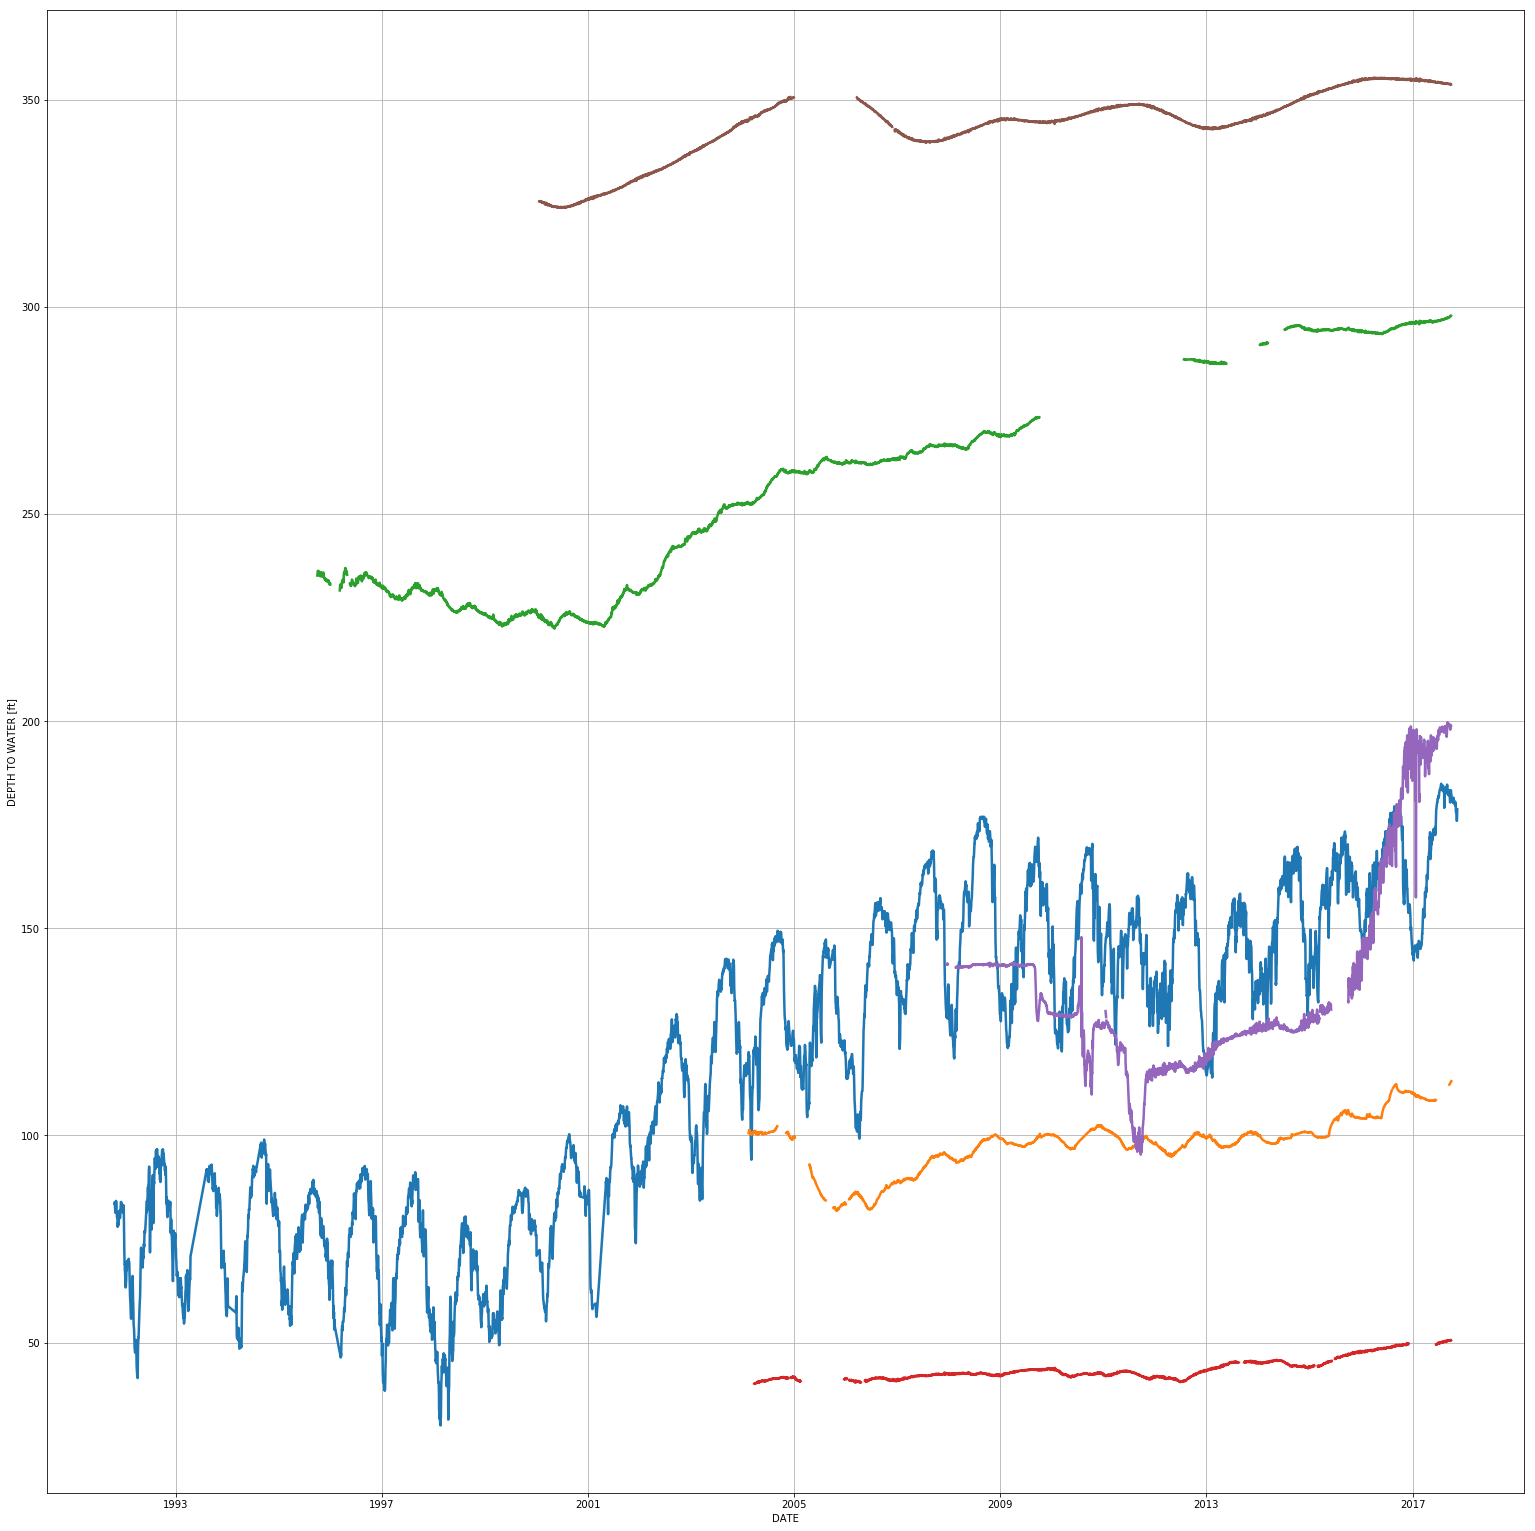

In [8]:
fig = plt.figure(figsize=(90, 60)) #plotting all 6 wells straight away, daily measurements of Depth to Water in ft
ax = fig.add_subplot(236)

ax.plot(well1['Date'], well1['Depth to Water ft'], linewidth=2.5)
ax.plot(well2['Date'], well2['Depth to Water ft'], linewidth=2.5)
ax.plot(well3['Date'], well3['Depth to Water ft'], linewidth=2.5)
ax.plot(well4['Date'], well4['Depth to Water ft'], linewidth=2.5)
ax.plot(well5['Date'], well5['Depth to Water ft'], linewidth=2.5)
ax.plot(well6['Date'], well6['Depth to Water ft'], linewidth=2.5)

ax.set_xlabel('DATE')
ax.set_ylabel('DEPTH TO WATER [ft]')
ax.grid(which='both', axis='both')

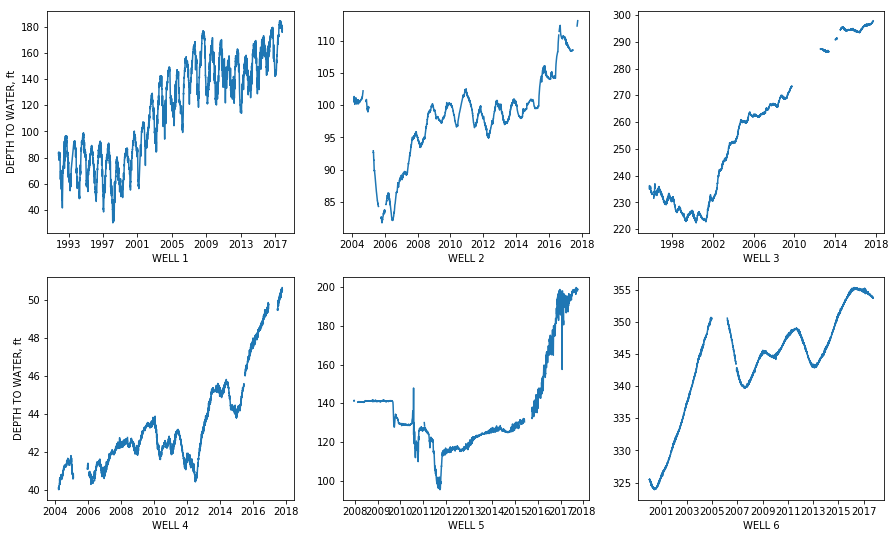

In [12]:
fig_sub = plt.figure(figsize=(15.0, 9.0)) #plotting each well individually

axes1 = fig_sub.add_subplot(2, 3, 1)
axes2 = fig_sub.add_subplot(2, 3, 2)
axes3 = fig_sub.add_subplot(2, 3, 3)
axes4 = fig_sub.add_subplot(2, 3, 4)
axes5 = fig_sub.add_subplot(2, 3, 5)
axes6 = fig_sub.add_subplot(2, 3, 6)

axes1.set_xlabel('WELL 1')
axes1.set_ylabel('DEPTH TO WATER, ft')
axes1.plot(well1['Date'], well1['Depth to Water ft'])

axes2.set_xlabel('WELL 2')
axes2.plot(well2['Date'], well2['Depth to Water ft'])

axes3.set_xlabel('WELL 3')
axes3.plot(well3['Date'], well3['Depth to Water ft'])

axes4.set_xlabel('WELL 4')
axes4.set_ylabel('DEPTH TO WATER, ft')
axes4.plot(well4['Date'], well4['Depth to Water ft'])

axes5.set_xlabel('WELL 5')
axes5.plot(well5['Date'], well5['Depth to Water ft'])

axes6.set_xlabel('WELL 6')
axes6.plot(well6['Date'], well6['Depth to Water ft'])

In [13]:
#In order to do a real time series analysis, we will need to interpolate missing data in wells 2, 3, 4, 5 and 6
#I will use .interpolate
well2= well2.interpolate()
well3= well3.interpolate()
well4= well4.interpolate()
well5= well5.interpolate()
well6= well6.interpolate()

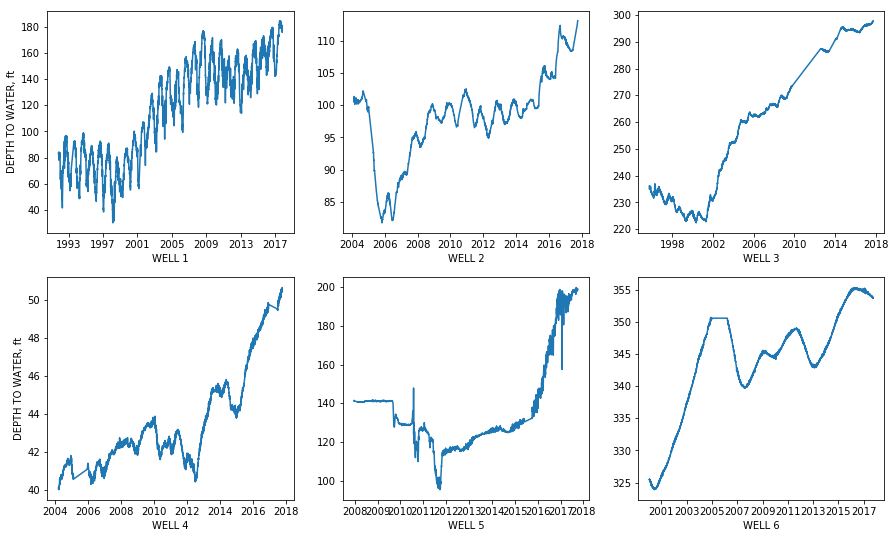

In [14]:
fig_sub = plt.figure(figsize=(15.0, 9.0)) #replotting with interpolated data

axes1 = fig_sub.add_subplot(2, 3, 1)
axes2 = fig_sub.add_subplot(2, 3, 2)
axes3 = fig_sub.add_subplot(2, 3, 3)
axes4 = fig_sub.add_subplot(2, 3, 4)
axes5 = fig_sub.add_subplot(2, 3, 5)
axes6 = fig_sub.add_subplot(2, 3, 6)

axes1.set_xlabel('WELL 1')
axes1.set_ylabel('DEPTH TO WATER, ft')
axes1.plot(well1['Date'], well1['Depth to Water ft'])

axes2.set_xlabel('WELL 2')
axes2.plot(well2['Date'], well2['Depth to Water ft'])

axes3.set_xlabel('WELL 3')
axes3.plot(well3['Date'], well3['Depth to Water ft'])

axes4.set_xlabel('WELL 4')
axes4.set_ylabel('DEPTH TO WATER, ft')
axes4.plot(well4['Date'], well4['Depth to Water ft'])

axes5.set_xlabel('WELL 5')
axes5.plot(well5['Date'], well5['Depth to Water ft'])

axes6.set_xlabel('WELL 6')
axes6.plot(well6['Date'], well6['Depth to Water ft'])

In [15]:
#converting index back to a monotonic index on the x axis for our periodogram and deleting the 'Date' column

well1reset = well1.reset_index()
well2reset = well2.reset_index()
well3reset = well3.reset_index()
well4reset = well4.reset_index()
well5reset = well5.reset_index()
well6reset = well6.reset_index()

well1reset.set_index(['index'])
del well1reset['Date']
well2reset.set_index(['index'])
del well2reset['Date']
well3reset.set_index(['index'])
del well3reset['Date']
well4reset.set_index(['index'])
del well4reset['Date']
well5reset.set_index(['index'])
del well5reset['Date']
well6reset.set_index(['index'])
del well6reset['Date']

In [10]:
from scipy import signal
from scipy.fftpack import * 

In [16]:
#first step in creating a periodogram is detrending the data
detrend1 = signal.detrend(well1reset, axis=0)
detrend2 = signal.detrend(well2reset, axis=0)
detrend3 = signal.detrend(well3reset, axis=0)
detrend4 = signal.detrend(well4reset, axis=0)
detrend5 = signal.detrend(well5reset, axis=0)
detrend6 = signal.detrend(well6reset, axis=0)

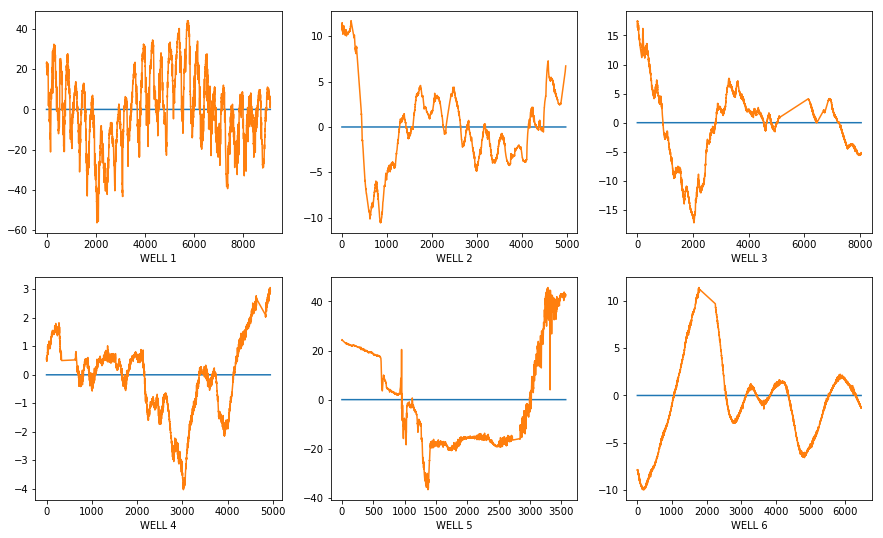

In [17]:
fig_per = plt.figure(figsize=(15.0, 9.0)) #plotting detrended data

axes1 = fig_per.add_subplot(2, 3, 1)
axes2 = fig_per.add_subplot(2, 3, 2)
axes3 = fig_per.add_subplot(2, 3, 3)
axes4 = fig_per.add_subplot(2, 3, 4)
axes5 = fig_per.add_subplot(2, 3, 5)
axes6 = fig_per.add_subplot(2, 3, 6)

axes1.set_xlabel('WELL 1')
axes1.plot(detrend1)

axes2.set_xlabel('WELL 2')
axes2.plot(detrend2)

axes3.set_xlabel('WELL 3')
axes3.plot(detrend3)

axes4.set_xlabel('WELL 4')
axes4.plot(detrend4)

axes5.set_xlabel('WELL 5')
axes5.plot(detrend5)

axes6.set_xlabel('WELL 6')
axes6.plot(detrend6)

In [18]:
#taking the first half of the data for calculating the FFT
detrend1 = detrend1[0:9106]
detrend2 = detrend2[0:4982]
detrend3 = detrend3[0:8036]
detrend4 = detrend4[0:4540]
detrend5 = detrend5[0:3573]
detrend6 = detrend6[0:6464]

In [19]:
#taking the discrete FFT to determine the Fourier coefficients

dis1= np.fft.fft(detrend1)
dis2= np.fft.fft(detrend2)
dis3= np.fft.fft(detrend3)
dis4= np.fft.fft(detrend4)
dis5= np.fft.fft(detrend5)
dis6= np.fft.fft(detrend6)

In [20]:
#taking the absolute value and squaring the coefficients

fft1 =abs(dis1)**2
fft2 =abs(dis2)**2
fft3 =abs(dis3)**2
fft4 =abs(dis4)**2
fft5 =abs(dis5)**2
fft6 =abs(dis6)**2

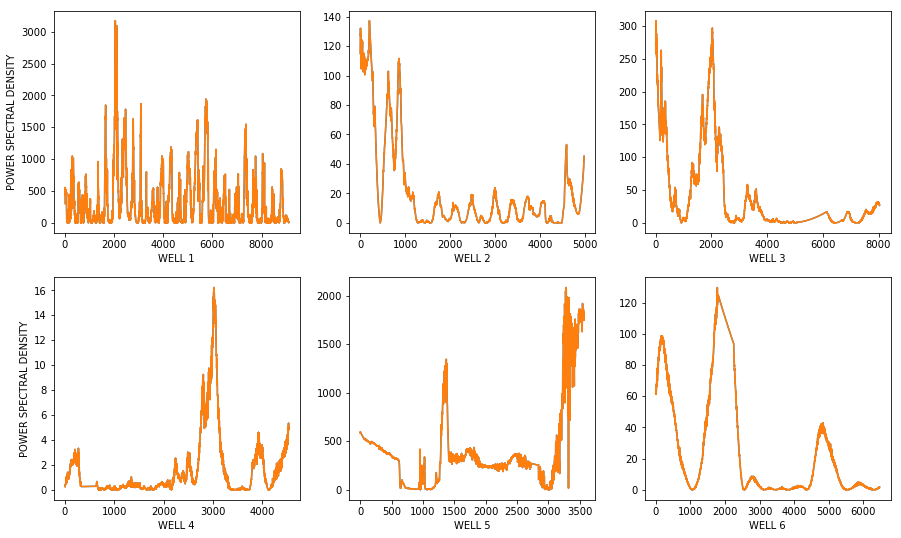

In [21]:
fig_per = plt.figure(figsize=(15.0, 9.0)) #plotting periodograms for each well

axes1 = fig_per.add_subplot(2, 3, 1)
axes2 = fig_per.add_subplot(2, 3, 2)
axes3 = fig_per.add_subplot(2, 3, 3)
axes4 = fig_per.add_subplot(2, 3, 4)
axes5 = fig_per.add_subplot(2, 3, 5)
axes6 = fig_per.add_subplot(2, 3, 6)

axes1.set_xlabel('WELL 1')
axes1.set_ylabel('POWER SPECTRAL DENSITY')
axes1.plot(fft1)

axes2.set_xlabel('WELL 2')
axes2.plot(fft2)

axes3.set_xlabel('WELL 3')
axes3.plot(fft3)

axes4.set_xlabel('WELL 4')
axes4.set_ylabel('POWER SPECTRAL DENSITY')
axes4.plot(fft4)

axes5.set_xlabel('WELL 5')
axes5.plot(fft5)

axes6.set_xlabel('WELL 6')
axes6.plot(fft6)

In [22]:
#FYI, I cross-checked these using the periodogram estimator signal.periodgram() and received vitually the same results.

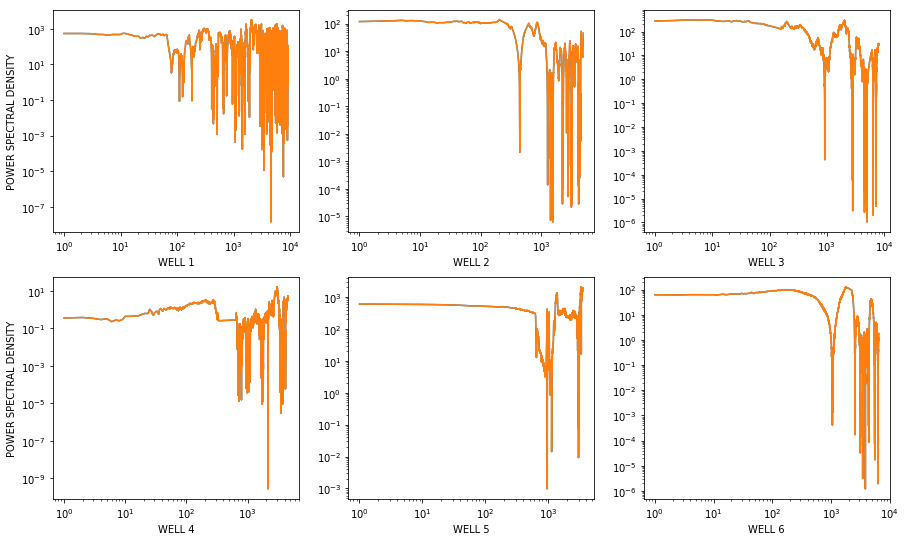

In [22]:
fig_log = plt.figure(figsize=(15.0, 9.0)) #plotting periodograms in log-log space

axes1 = fig_log.add_subplot(2, 3, 1)
axes2 = fig_log.add_subplot(2, 3, 2)
axes3 = fig_log.add_subplot(2, 3, 3)
axes4 = fig_log.add_subplot(2, 3, 4)
axes5 = fig_log.add_subplot(2, 3, 5)
axes6 = fig_log.add_subplot(2, 3, 6)

axes1.set_xlabel('WELL 1')
axes1.set_ylabel('POWER SPECTRAL DENSITY')
axes1.loglog(fft1)

axes2.set_xlabel('WELL 2')
axes2.loglog(fft2)

axes3.set_xlabel('WELL 3')
axes3.loglog(fft3)

axes4.set_xlabel('WELL 4')
axes4.set_ylabel('POWER SPECTRAL DENSITY')
axes4.loglog(fft4)

axes5.set_xlabel('WELL 5')
axes5.loglog(fft5)

axes6.set_xlabel('WELL 6')
axes6.loglog(fft6)

Looking at these graphs, this is not necessarily what I expected to see. I expected to see that the majority of the variance contributed to the Well depths was due to the annual seasonal cycle, what would be a frequency of '365'. Indeed, going back to the the inital plot of the Well 1 Time Series as an example, we can visually estimate a strong annual periodicity of time period 1 year. Yet the periodogram shows otherwise. Looking at Well 1, we see the biggest peak occurs not at a frequency of 365, but around ~2000 days(5.5 years). Wells 3 and 6 demonstrate similar results. Wells 4 and 5 have their highest peaks around 3000 (8.2 years), and Well 2's highest peak is roughly ~365. So of the 6 wells measured in the sub-basin, only one has its strongest periodicity at a frequency around ~365. We must keep in mind too that Well 1 has the most data, with daily measurements going back to 1991 (36 years), roughly triple the average data length of the other 5 wells. This leads me to conclude that for Wells 1, 3, and 6 (half the wells measured) over the longest graphed period of 1991-2017, the strongest periodicity was in fact a periodicity occuring over a period of roughly 5.5 years. 

What natural phenomena corresponds to this 5.5 years? Looking at the history of California drought cycle, it appears the biggest contributor to the periodicity of the Depth-to-Water measurements in these wells is the drought cycle itself. Recorded California drought cycles during the time period measured took place in 1986-1992(6 years), 2007-2009(2 years), and 2011-2017(6 years), for an average length of 4.7 years. 

This is a bit of a "duh" moment, as less preciptation over a drought period leads to less recharge during that period. But I am surprised by the extent to which the data really dampens the effects of seasonality and emphasizes the moderate term effects of the drought cycle. 

Instead, the more insightful conclusion may be the tendency of California drought cycles to follow a roughly 4.7-5.5 year trajectory(frequency of ~2000 days). 

Therefore, I would conclude that well depths, and by extension overall aquifer sustainability, are less dependant on the precipitation during one particular season and more dependant on which 4-5 year cycle the basin happens to be in. 

Further areas of study could be analyzing the spatial element of the Depth-to-Water measurements with respect to Well location, particualry in wells that are in close proximity to each other, for purposes of developing criteria for limits on groundwater pumping and facilitating the exchange of groundwater allocation rights, an issue of particular concern in California.

Resources

Data includes USGS well#'s 340615117170902, 340316117174102, 340606117223804, 340321117153803, 340130117054905, 340927117242201 from USGS Groundwater Watch, California Active Water Level Network-

https://groundwaterwatch.usgs.gov/StateMap.asp?sa=CA&sc=06

California Interactive Map of Groundwater Basins- 
http://sgma.water.ca.gov/bbat/?appid=160718113212&subbasinid=8-02.04

Info and Delineation of Santa Ana Groundwater Subbasin- http://sgma.water.ca.gov/bbat/?appid=160718113212&subbasinid=8-02.04

California Bulletin 118 and Bulletin 118 interim update- http://www.water.ca.gov/groundwater/bulletin118/b118_2016_data.cfm
http://www.water.ca.gov/groundwater/bulletin118/docs/Bulletin_118_Interim_Update_2016.pdf

In [33]:
e, f= signal.periodogram(fft1)
b, a = signal.butter(8, 0.125, btype='low')
y = signal.filtfilt(b, a, f, padlen=10)

ValueError: The length of the input vector x must be at least padlen, which is 10.

In [29]:
fft1

array([[ 532.06282672,  532.06282672],
       [ 545.40406511,  545.40406511],
       [ 544.81572873,  544.81572873],
       ..., 
       [   1.06737781,    1.06737781],
       [   6.35312325,    6.35312325],
       [  12.65894244,   12.65894244]])